<a href="https://colab.research.google.com/github/koriatul/pytn-ks-011/blob/main/PYTN_Assgn_2_4_Koriatul_Qibtiah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Koriatul Qibtiah<h1>
<h2> PYTN-KS11-015 <h2>

In [2]:
#mengimport library
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import folium
from IPython.display import Math, Latex
%matplotlib inline

In [3]:
#melihat data
nyc_rolling = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sesi_10 Inferential Statistics/nyc-rolling-sales.csv')
nyc_rolling

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [4]:
nyc_rolling.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [9]:
#mengubah isi data dari kolom borough menjadi sebagai berikut :
# 1 = Manhattan
# 2 = Bronx
# 3 = Brookly
# 4 = Queens
# 5 = Staten Island

nyc_rolling['borough'][nyc_rolling['borough'] == 1] = 'Manhattan'
 
nyc_rolling['borough'][nyc_rolling['borough'] == 2] = 'Bronx'

nyc_rolling['borough'][nyc_rolling['borough'] == 3] = 'Brooklyn'

nyc_rolling['borough'][nyc_rolling['borough'] == 4] = 'Queens'

nyc_rolling['borough'][nyc_rolling['borough'] == 5] = 'Staten Island'

nyc_rolling.head()

<ipython-input-9-99b6664137eb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_rolling['borough'][nyc_rolling['borough'] == 1] = 'Manhattan'


,unnamed: 0,borough,neighborhood,building class category,tax class at present,block,lot,ease-ment,building class at present,address,...,residential units,commercial units,total units,land square feet,gross square feet,year built,tax class at time of sale,building class at time of sale,sale price,sale date
0,4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [8]:
nyc_rolling.columns = map(str.lower, nyc_rolling.columns)
nyc_rolling.head()

,unnamed: 0,borough,neighborhood,building class category,tax class at present,block,lot,ease-ment,building class at present,address,...,residential units,commercial units,total units,land square feet,gross square feet,year built,tax class at time of sale,building class at time of sale,sale price,sale date
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [10]:
#mengecek data
nyc_rolling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   unnamed: 0                      84548 non-null  int64 
 1   borough                         84548 non-null  object
 2   neighborhood                    84548 non-null  object
 3   building class category         84548 non-null  object
 4   tax class at present            84548 non-null  object
 5   block                           84548 non-null  int64 
 6   lot                             84548 non-null  int64 
 7   ease-ment                       84548 non-null  object
 8   building class at present       84548 non-null  object
 9   address                         84548 non-null  object
 10  apartment number                84548 non-null  object
 11  zip code                        84548 non-null  int64 
 12  residential units               84548 non-null

In [11]:
nyc_rolling.describe()

,unnamed: 0,block,lot,zip code,residential units,commercial units,total units,year built,tax class at time of sale
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


<h1> Measure of Central Tendency<h1>

<h2> Mean <h2>

- Mean:adalah rata-rata yang diperoleh dari jumlah semua data dibagi dengan banyak data

In [12]:
a = nyc_rolling.iloc[0:, 12:14]
a

,residential units,commercial units
0,5,0
1,28,3
2,16,1
3,10,0
4,6,0
...,...,...
84543,2,0
84544,2,0
84545,2,0
84546,0,7


data tersebut diambil pada kolom residential units dan commercial units ,data tersebut dikelompokan dihitung untuk menemukan mean ,median,dan mode.

In [13]:
a_residu = a.iloc[:, :1]
a_commeru = a.iloc[:, 1:]

print(a_residu)
print(a_commeru)

       residential units
0                      5
1                     28
2                     16
3                     10
4                      6
...                  ...
84543                  2
84544                  2
84545                  2
84546                  0
84547                  0

[84548 rows x 1 columns]
       commercial units
0                     0
1                     3
2                     1
3                     0
4                     0
...                 ...
84543                 0
84544                 0
84545                 0
84546                 7
84547                 1

[84548 rows x 1 columns]


In [14]:
a_11 = np.mean(a_residu)
a_21 = np.mean(a_commeru)

print(a_11)
print(a_21)

residential units    2.025264
dtype: float64
commercial units    0.193559
dtype: float64


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


<h2> Median <h2> 

- Median adalah nilai tengah dari
kumpulan data yang telah diurutkan.

In [15]:
a_12 = np.median(a_residu)
a_22 = np.median(a_commeru)

print(a_12)
print(a_22)

1.0
0.0


<h2> Mode <h2>

- Mode adalah data yang paling sering muncul atau data yang memiliki frekuensi terbesar.

In [16]:
a_13 = scipy.stats.mode(a_residu)
a_23 = scipy.stats.mode(a_commeru)

print(a_13)
print(a_23)

ModeResult(mode=array([[1]]), count=array([[34722]]))
ModeResult(mode=array([[0]]), count=array([[79429]]))


<ipython-input-16-2ee6aa88ca09>:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  a_13 = scipy.stats.mode(a_residu)
<ipython-input-16-2ee6aa88ca09>:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  a_23 = scipy.stats.mode(a_commeru)


<h1>Measure of Spread<h1>

- Range adalah perbedaan antara data terbesar dengan data terkecil yang terdapat pada sekelompok data.

In [17]:
#melihat kembali data a_residu dan a_commeru untuk digunakan dalam mencari range,standar deviasi, dan varians.
a_residu = a.iloc[:, :1]
a_commeru = a.iloc[:, 1:]
print(a_residu)
print(a_commeru)

       residential units
0                      5
1                     28
2                     16
3                     10
4                      6
...                  ...
84543                  2
84544                  2
84545                  2
84546                  0
84547                  0

[84548 rows x 1 columns]
       commercial units
0                     0
1                     3
2                     1
3                     0
4                     0
...                 ...
84543                 0
84544                 0
84545                 0
84546                 7
84547                 1

[84548 rows x 1 columns]


In [18]:
b_11 = a_residu.min()
b_12 = a_residu.max()
b_13 = b_12 - b_11 

print('Range dari ', b_13)

Range dari  residential units    1844
dtype: int64


<h1>Variance<h1>

- Varians adalah salah satu ukuran dispersi atau ukuran variasi.  Varians dapat menggambarkan bagaimana berpencarnya suatu data kuantitatif.  Varians diberi simbol  σ2 (baca: sigma kuadrat)

<h1>Standard Deviation<h1>

- Standar deviasi atau simpangan baku adalah persebaran data pada suatu sampel untuk melihat seberapa jauh atau seberapa dekat nilai data dengan rata-ratanya.

In [19]:
b_sd = np.std(a_residu,ddof=1)
b_var = np.var(a_residu,ddof=1)

print('Standar deviasi dari ', b_sd)
print('Variansi dari ', b_var)

Standar deviasi dari  residential units    16.721037
dtype: float64
Variansi dari  residential units    279.593079
dtype: float64


In [21]:
b_21 = a_commeru.min()
b_22 = a_commeru.max()
b_23 = b_22 - b_21

print('Range dari', b_23)

Range dari commercial units    2261
dtype: int64


In [20]:
b_sd = np.std(a_commeru,ddof=1)
b_var = np.var(a_commeru,ddof=1)

print('Standar deviasi dari', b_sd)
print('Variansi dari', b_var)

Standar deviasi dari commercial units    8.713183
dtype: float64
Variansi dari commercial units    75.919564
dtype: float64


Dengan demikian dapat disimpulkan:
- Residential unit
memiliki range sebesar 1844, jumlah standar deviasi sebesar  16.721037, dan nilai varians sebesar 279.593079.

- Commersial unit memiliki range sebesar 2261, jumlah standar deviasi sebesar  8.713183, dan nilai varians sebesar 75.919564.

<h1>Probability Distribution<h1>

<h2>Uniform Distribution<h2>

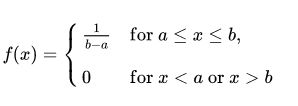

In [22]:
from PIL import Image
img = Image.open('/content/drive/MyDrive/Colab Notebooks/sesi_10 Inferential Statistics/Screenshot (46).png')
img.show()

<ipython-input-23-f0dce3608f7f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residu_uniform)


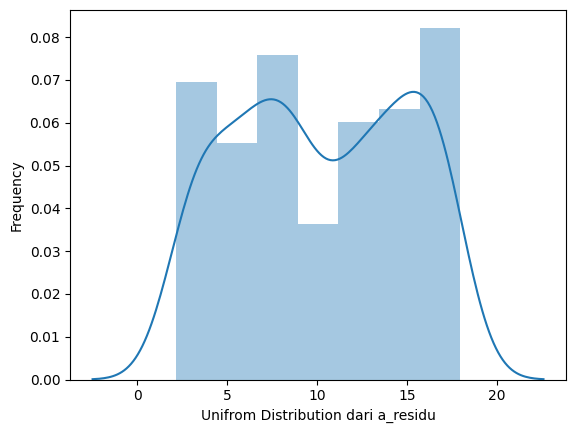

In [23]:
from scipy.stats import uniform
residu_uniform = uniform.rvs(size=280, loc=2 , scale=16)
sns.distplot(residu_uniform)
plt.xlabel('Unifrom Distribution dari a_residu')
plt.ylabel('Frequency')
plt.show()

Argumen loc sesuai dengan mean (μ), scale sesuai dengan standard deviasi (σ), dan size jumlah variasi acak.

<h2>Normal Distribution<h2>

Rumus fungsi data berdistribusi normal sebagai berikut. <br>
$f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^{2}}{2\sigma^{2}}}$.

<ipython-input-24-887269445e08>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residu_2)


<Axes: xlabel='Normal Distribution berdasarkan a_residu', ylabel='Frequency'>

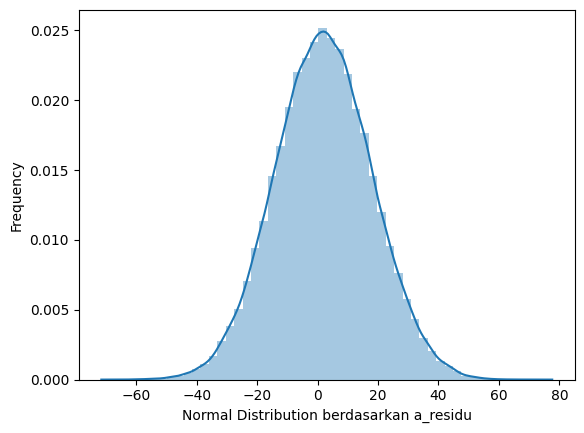

In [24]:
from scipy.stats import norm
residu_2 = norm.rvs(size=84548,loc=2,scale=16)
plt.xlabel('Normal Distribution berdasarkan a_residu')
plt.ylabel('Frequency')
sns.distplot(residu_2)

Argumen loc sesuai dengan mean $(\mu)$, scale sesuai dengan standard deviasi $(\sigma)$, dan size jumlah variasi acak.

<h1>Gamma Distribution<h1>

Rumus fungsi data berdistribusi gamma sebagai berikut. <br>
$f(x) = \frac{x^{a-1}}{\beta^{a}\Gamma(a)}e^{-\frac{x}{\beta}}$.

<ipython-input-25-17bdd2a441eb>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residu_3)


<Axes: xlabel='Gamma Distribution berdasarkan a_residu', ylabel='Frequency'>

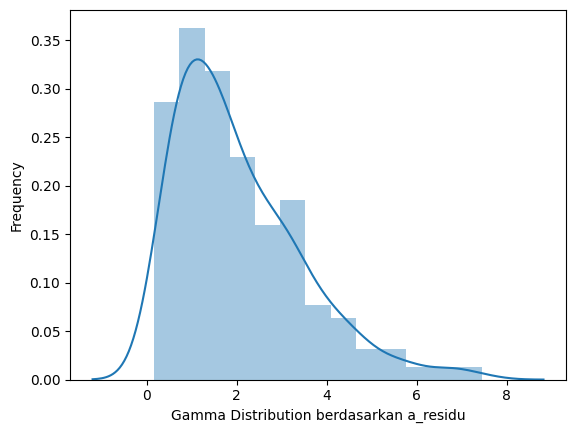

In [25]:
from scipy.stats import gamma
residu_3 = gamma.rvs(size=280,a=2)
plt.xlabel('Gamma Distribution berdasarkan a_residu')
plt.ylabel('Frequency')
sns.distplot(residu_3)

Pada data diatas a = 2 sebagai puncak distribusi <br>
Ketika a = 1 maka akan berfungsi menjadi distribusi eksponensial

Argumen loc sesuai dengan mean $(\mu)$ distribusi, scale sesuai dengan standard deviasi $(\sigma)$, dan size jumlah variasi acak.

<h1>Exponential Distribution<h1>

<ipython-input-26-392d30f16ded>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residu_4)


<Axes: xlabel='Exponential Distribution berdasarkan a_residu', ylabel='Frequency'>

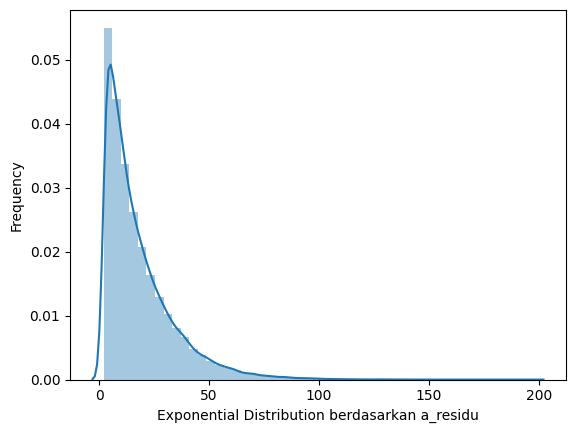

In [26]:
from scipy.stats import expon
residu_4 = expon.rvs(size=84548,loc=2,scale=16)
plt.xlabel('Exponential Distribution berdasarkan a_residu')
plt.ylabel('Frequency')
sns.distplot(residu_4)

Argumen loc sesuai dengan mean $(\mu)$ distribusi, scale sesuai dengan standard deviasi $(\sigma)$, dan size jumlah variasi acak.

<h1>Poisson Distribution<h1>

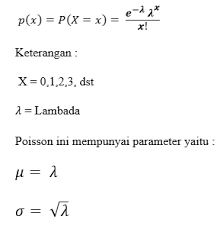

In [27]:
from PIL import Image
img = Image.open('/content/drive/MyDrive/Colab Notebooks/sesi_10 Inferential Statistics/rumus poison.png')
img.show()

<ipython-input-28-f4eeba725a66>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residu_2)


<Axes: xlabel='Poisson Distribution berdasarkan a_residu', ylabel='Frequency'>

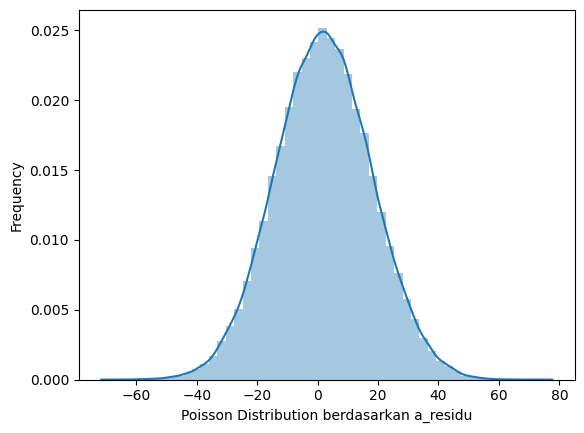

In [28]:
from scipy.stats import poisson
residu_5 = poisson.rvs(size=84548,mu=280)
plt.xlabel('Poisson Distribution berdasarkan a_residu')
plt.ylabel('Frequency')
sns.distplot(residu_2)

<h1>Binomial Distribution<h1>

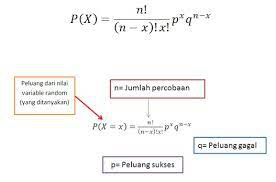

In [29]:
from PIL import Image
img = Image.open('/content/drive/MyDrive/Colab Notebooks/sesi_10 Inferential Statistics/binomial distribution.jpg')
img.show()

In [31]:
bidis = nyc_rolling.iloc[0: ,1:3]
print(bidis)

             borough   neighborhood
0          Manhattan  ALPHABET CITY
1          Manhattan  ALPHABET CITY
2          Manhattan  ALPHABET CITY
3          Manhattan  ALPHABET CITY
4          Manhattan  ALPHABET CITY
...              ...            ...
84543  Staten Island        WOODROW
84544  Staten Island        WOODROW
84545  Staten Island        WOODROW
84546  Staten Island        WOODROW
84547  Staten Island        WOODROW

[84548 rows x 2 columns]


In [32]:
bidis = scipy.stats.mode(bidis)
print(bidis)
p = 26736/84548
print(p)

ModeResult(mode=array([['Queens', 'FLUSHING-NORTH']], dtype=object), count=array([[26736,  3068]]))
0.3162227373799498


<ipython-input-32-344398d74bdb>:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  bidis = scipy.stats.mode(bidis)
<ipython-input-32-344398d74bdb>:1: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  bidis = scipy.stats.mode(bidis)


Data distribusi yang akan ditunjukkan ialah berdasarkan kemunculan data FLUSHING-NORTH.

<ipython-input-33-9399133f2f36>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bidis)


<Axes: xlabel='Binomial Distribution berdasarkan bidis', ylabel='Frequency'>

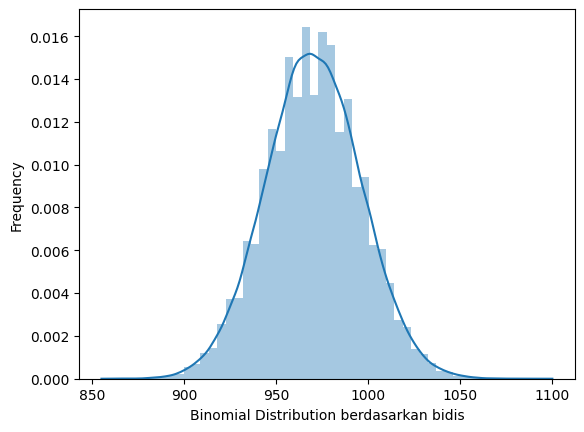

In [33]:
from scipy.stats import binom
bidis = binom.rvs(n = 3068, p=0.3162227373799498, size=84548)
plt.xlabel('Binomial Distribution berdasarkan bidis')
plt.ylabel('Frequency')
sns.distplot(bidis)

Berdasarkan data wilayah, ditunjukkan distribusi FLUSHING-NORTH muncul. Parameter-parameter yang digunakan sebagai berikut. <br>
n = jumlah data NORTH muncul (jumlah total percobaan) , n disini saya menggunakan data wilayah North <br>
size = jumlah keseluruhan data <br> p = peluang sukses  data FLUSHING-NORTH muncul.

<h1>Bernoulli Distribution<h1>

hanya memiliki 2 kemungkinan yaitu 1 (berhasil) dan 0 (gagal)

<ipython-input-34-bcf82c6a7617>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residu_ber)


<Axes: ylabel='Density'>

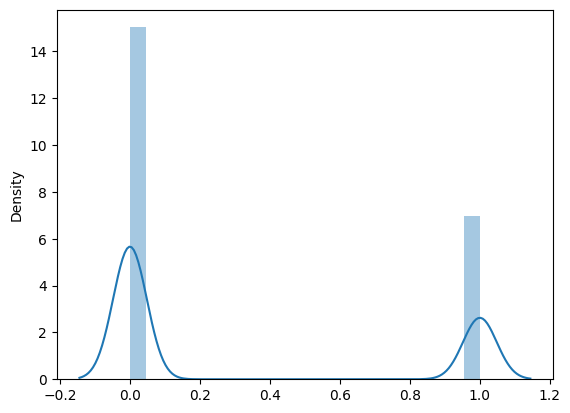

In [34]:
from scipy.stats import bernoulli
residu_ber = bernoulli.rvs(size=84548,p=0.3162227373799498)
sns.distplot(residu_ber)

parameter yang digunakan size dari jumlah keseluruhan data dan p=peluang

<h1>Confident Intervals<h1>

Confidence interval = $\mu \pm (z-score \times ste)$ <br> dengan
ste = $\sqrt{\frac{p(1-p)}{n}}$. <br>
Berikut parameter-parameter yang digunakan.
- $\mu$ = rata-rata
- z-score = nilai z
- ste = standar eror
- p = probabilitas data ($\frac{x}{n}$)
- x = jumlah data yang muncul
- n = jumlah keseluruhan data <br>

Selanjutnya, akan ditunjukkan confidence interval berdasarkan data wilayah Manhattan yang memiliki kelas pajak saat ini di posisi '2'.

In [46]:
#Jumlah data wilayah Manhattan
ci_d= nyc_rolling[nyc_rolling['borough']=='Manhattan']
ci_d.shape

(18306, 22)

In [47]:
#Jumlah data dari wilayah Manhattan dan kelas pajak = 2
ci_taxclass = nyc_rolling[(nyc_rolling['borough'] =='Manhattan')&(nyc_rolling['tax class at present']== '2')]
ci_taxclass.shape

(15320, 22)

In [48]:
n = 18306
p = 15320/n
ste = (p*(1-p)/n)**(1/2)
print(ste)

0.0027307635500708077


In [49]:
z_score = 1.96
low_ci = p - (z_score*ste)
up_ci = p + (z_score*ste)
print(low_ci)
print(up_ci)

0.8315317851637011
0.8422363782799785


Berdasarkan perhitungan data diatas, dapat diperoleh hasil sebagai berikut. <br>
Confidence interval = $\mu \pm (z-score \times ste)$ <br>
- $\mu + (z-score \times ste) = 0.8315317851637011 $
- $\mu - (z-score \times ste) = 0.8422363782799785 $

<h1>Hypothesis Testing<h1>

- One Population Proportion <br>
Kuantitas yang digunakan untuk menafsirkan hasil tes dengan menerima atau menolak hipotesis awal $(H_0)$.

In [54]:
ht = nyc_rolling[nyc_rolling['borough']=='Bronx']
print(ht.shape)
ht_1 = nyc_rolling[nyc_rolling['borough']=='Staten Island']
print(ht_1.shape)

(7049, 22)
(8410, 22)


Berdasarkan data yang diambil, dipilih hipotesis awal, yaitu rata-rata total unit di Bronx > rata-rata total unit di Staten Island. <br>
- $H_0 : \mu_{e} > \mu_{f}$
- $H_1 : \mu_{e} \leq \mu_{f}$.

In [55]:
ht_2 = ht.iloc[:,14:15]
print(ht_2)
ht_3 = ht_1.iloc[:, 14:15]
print(ht_3)

       total units
18306            1
18307            1
18308            1
18309            1
18310            1
...            ...
25350            0
25351            0
25352            2
25353            2
25354            1

[7049 rows x 1 columns]
       total units
76138            1
76139            1
76140            1
76141            1
76142            1
...            ...
84543            2
84544            2
84545            2
84546            7
84547            1

[8410 rows x 1 columns]


In [59]:
ht_4 = np.mean(ht_2)
ht_5 = np.std(ht_2,ddof=1)
print('rata-rata',ht_4)
print('standar deviasi',ht_5)
ht_6 = np.mean(ht_3)
ht_7 = np.std(ht_3,ddof=1)
print('rata-rata',ht_6)
print('standar deviasi',ht_7)

rata-rata total units    3.603774
dtype: float64
standar deviasi total units    24.000651
dtype: float64
rata-rata total units    1.309869
dtype: float64
standar deviasi total units    3.007591
dtype: float64


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Dari data diatas dapat disimpulkan bahwa rata-rata total units di wilayah Bronx yaitu 3.603774 dan rata-rata total units di wilayah Staten Island yaitu  1.309869 <br> dengan demikian diperolah 1.309869 < 3.603774 .  artinya hipotesis awal ditolak .


<h1>Overall Analysis<h1> 

1. Mean dari residential units yaitu 2.025264 ,median nya yaitu 1.0 dan mode yaitu 34722
2. Mean dari commercial units yaitu  0.193559 , mediannya yaitu 0.0 , dan mode yaitu sebanyak 79429 
3. Residential unit memiliki range sebesar 1844, jumlah standar deviasi sebesar 16.721037, dan nilai varians sebesar 279.593079.
4. Commersial unit memiliki range sebesar 2261, jumlah standar deviasi sebesar 8.713183, dan nilai varians sebesar 75.919564.
5. Data unit di wiliayah Manhatta yang memiliki kelas pajak '2' memiliki nilai confidence interval dari 0.8315317851637011 = 83.1% sampai 0.8422363782799785 = 84.2%.
6. Rata-rata total units di wilayah Staten Island $\leq$ wilayah Bronx